In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Importing Data

In [212]:
%ls

1564704682_Southern_Water_Corp_-_Executive_Presentation_PPT_Template.pptx
1626578157742870_passport.pdf
Capstone1.pptx
Cov.docx
Cover.docx
Covid EDA (Exploratory Data Analysis) (1).ipynb
Covid EDA (Exploratory Data Analysis) V4.ipynb
DF_Raw_Data.csv
DF_Rolling_Stdev.csv
Docker.dmg
Document4.docx
Fii level 1 freediving course info 03521.docx
Issue Tree Capstone 2.pptx
Kat.pdf
KatTheAnalyst.pdf
KaterinaTheAnalyst.pdf
Mock Interview Python Exercise/
TableauAutoUpdate/
Tell me.docx
cleansed_data.csv
cleansed_data2.csv
owid-covid-data.csv
tight deadline.docx
~$Lab6Start v5.xlsx
~$Statistics Case Study Student Reference 27062020.xlsx


In [213]:
df = pd.read_csv("owid-covid-data.csv")

## Exploratory Analysis

In [214]:
df.head(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


### Checking Missing Values

In [215]:
# null values by rows. axis = 1 specifies that the sum is gonna be done on the x axis
df.isnull().sum(axis=1)

0        38
1        38
2        38
3        38
4        38
         ..
92126     9
92127     9
92128    18
92129    19
92130    28
Length: 92131, dtype: int64

### Keeping only columns with less than 5% of missing values

In [216]:
#saving number of rows in data set
total_rows = df.shape[0]
total_rows

92131

In [217]:
#total missing valus
total_missing_val_by_col = df.isnull().sum()

In [218]:
total_missing_val_by_col

iso_code                                     0
continent                                 4372
location                                     0
date                                         0
total_cases                               2783
new_cases                                 2784
new_cases_smoothed                        3796
total_deaths                             12682
new_deaths                               12524
new_deaths_smoothed                       3796
total_cases_per_million                   3261
new_cases_per_million                     3262
new_cases_smoothed_per_million            4269
total_deaths_per_million                 13147
new_deaths_per_million                   12989
new_deaths_smoothed_per_million           4269
reproduction_rate                        18028
icu_patients                             82814
icu_patients_per_million                 82814
hosp_patients                            80548
hosp_patients_per_million                80548
weekly_icu_ad

In [219]:
#calculating percentage of missing values by column
perc_missing_vals = round((total_missing_val_by_col /total_rows) * 100,0)

In [220]:
perc_missing_vals

iso_code                                  0.0
continent                                 5.0
location                                  0.0
date                                      0.0
total_cases                               3.0
new_cases                                 3.0
new_cases_smoothed                        4.0
total_deaths                             14.0
new_deaths                               14.0
new_deaths_smoothed                       4.0
total_cases_per_million                   4.0
new_cases_per_million                     4.0
new_cases_smoothed_per_million            5.0
total_deaths_per_million                 14.0
new_deaths_per_million                   14.0
new_deaths_smoothed_per_million           5.0
reproduction_rate                        20.0
icu_patients                             90.0
icu_patients_per_million                 90.0
hosp_patients                            87.0
hosp_patients_per_million                87.0
weekly_icu_admissions             

In [221]:
# creating indexes of the columns with less than 5% of missing values
column_index = perc_missing_vals < 5

In [222]:
column_index

iso_code                                  True
continent                                False
location                                  True
date                                      True
total_cases                               True
new_cases                                 True
new_cases_smoothed                        True
total_deaths                             False
new_deaths                               False
new_deaths_smoothed                       True
total_cases_per_million                   True
new_cases_per_million                     True
new_cases_smoothed_per_million           False
total_deaths_per_million                 False
new_deaths_per_million                   False
new_deaths_smoothed_per_million          False
reproduction_rate                        False
icu_patients                             False
icu_patients_per_million                 False
hosp_patients                            False
hosp_patients_per_million                False
weekly_icu_ad

In [223]:
df.columns[column_index]

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'population'],
      dtype='object')

In [224]:
df.columns[column_index].values

array(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million', 'population'],
      dtype=object)

In [225]:
print("Columns with <5% missing values: \n{}".format(df.columns[column_index].values))
selected_columns = df.columns[column_index]

Columns with <5% missing values: 
['iso_code' 'location' 'date' 'total_cases' 'new_cases'
 'new_cases_smoothed' 'new_deaths_smoothed' 'total_cases_per_million'
 'new_cases_per_million' 'population']


In [226]:
selected_columns = df.columns[column_index]

In [227]:
selected_columns = selected_columns.tolist()

In [228]:
selected_columns

['iso_code',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'population']

In [229]:
selected_columns.append("total_deaths")
selected_columns.append("new_deaths")

In [230]:
selected_columns

['iso_code',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'population',
 'total_deaths',
 'new_deaths']

In [231]:
df_clean = df[selected_columns]

In [232]:
df_clean.head(2)

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,population,total_deaths,new_deaths
0,AFG,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,0.026,0.026,38928341.0,NaN,NaN
1,AFG,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,0.026,0.000,38928341.0,NaN,NaN


### Replacing remaining missing values with 0

In [233]:
df_clean = df_clean.fillna(0)

In [234]:
df_clean.isnull().sum()

iso_code                   0
location                   0
date                       0
total_cases                0
new_cases                  0
new_cases_smoothed         0
new_deaths_smoothed        0
total_cases_per_million    0
new_cases_per_million      0
population                 0
total_deaths               0
new_deaths                 0
dtype: int64

### Checking what iso-codes do we have  

In [235]:
df_clean.iso_code.unique()

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
       'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP',
       'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR', 'OWID_EUN', 'FRO',
       'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GIN', 'GNB',
       'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'OWID_INT',
       'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY',
       'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA',
       'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG

### Getting rid of the location rows that duplicate the data 

In [236]:
booleans = []
for location in df_clean.location:
    if location == "Asia" or location == "Africa" or location == "Europe" or location == "European Union" or location == "North America" or location == "Oceania" or location == "South America":
        booleans.append(False)
    else:
        booleans.append(True)

In [237]:
booleans [0:3]

[True, True, True]

In [238]:
correct_location = pd.Series(booleans)

In [239]:
correct_location.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [240]:
df_clean[correct_location]

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,population,total_deaths,new_deaths
0,AFG,Afghanistan,2020-02-24,1.0,1.0,0.000,0.000,0.026,0.026,38928341.0,0.0,0.0
1,AFG,Afghanistan,2020-02-25,1.0,0.0,0.000,0.000,0.026,0.000,38928341.0,0.0,0.0
2,AFG,Afghanistan,2020-02-26,1.0,0.0,0.000,0.000,0.026,0.000,38928341.0,0.0,0.0
3,AFG,Afghanistan,2020-02-27,1.0,0.0,0.000,0.000,0.026,0.000,38928341.0,0.0,0.0
4,AFG,Afghanistan,2020-02-28,1.0,0.0,0.000,0.000,0.026,0.000,38928341.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
92126,ZWE,Zimbabwe,2021-05-25,38706.0,10.0,15.857,0.571,2604.198,0.673,14862927.0,1587.0,1.0
92127,ZWE,Zimbabwe,2021-05-26,38819.0,113.0,29.571,0.857,2611.800,7.603,14862927.0,1589.0,2.0
92128,ZWE,Zimbabwe,2021-05-27,38854.0,35.0,31.286,1.000,2614.155,2.355,14862927.0,1592.0,3.0
92129,ZWE,Zimbabwe,2021-05-28,38918.0,64.0,36.286,0.857,2618.461,4.306,14862927.0,1592.0,0.0


In [241]:
df_clean = df_clean[correct_location]

In [242]:
df_clean.iso_code.unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG',
       'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD',
       'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI',
       'EST', 'SWZ', 'ETH', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'PYF',
       'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD',
       'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN',
       'ISL', 'IND', 'IDN', 'OWID_INT', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR',
       'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS',
       'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE',
       'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT',
       'MH

### Plotting the US cases vs. the Rest of the World

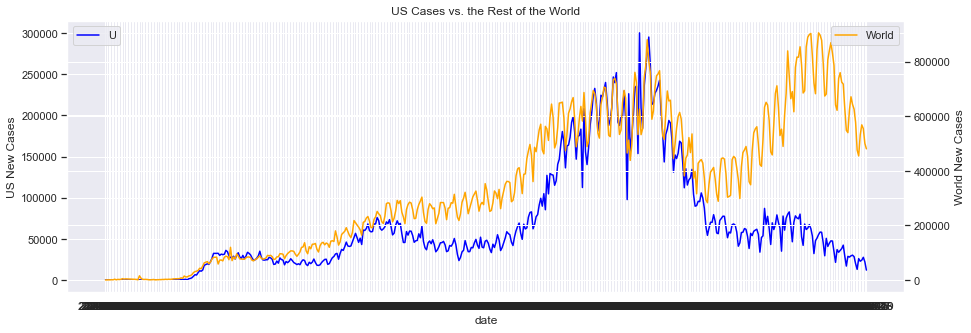

In [203]:
axis1 = df_clean.loc[df_clean["iso_code"]=="USA",["date", "new_cases"]].groupby("date").sum().plot(figsize=(15,5), color = 'blue', label = "US")
axis1.legend("US", loc="upper left")
axis1.set_ylabel("US New Cases")

axis2 = axis1.twinx()
axis2.plot(df_clean.loc[df_clean["iso_code"]=="OWID_WRL", ["date", "new_cases"]].groupby("date").sum(), color = 'orange', label = "World")
axis2.legend(loc="upper right")
axis2.set_ylabel("World New Cases")

plt.title('US Cases vs. the Rest of the World')
plt.show()

We first wanted to compare the distribution of Covid cases in the US and in the rest of the world. Clearly, there have been 3 waves everywhere in the world approximately at the same time. However the 3rd wave in the US was smaller than that in the rest of the world, probably due to the vaccination program start. 

### Calculating the death rate per total cases

In [244]:
#the likelihood of dying if one contracts Covid 
death_rate = (df_clean["total_deaths"]/df_clean["total_cases"])*100

In [245]:
death_rate

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
92126    4.100140
92127    4.093356
92128    4.097390
92129    4.090652
92130    4.094213
Length: 88731, dtype: float64

In [246]:
df_clean["death_rate"] = death_rate
df_clean.head(2)

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,population,total_deaths,new_deaths,death_rate
0,AFG,Afghanistan,2020-02-24,1.0,1.0,0.0,0.0,0.026,0.026,38928341.0,0.0,0.0,0.0
1,AFG,Afghanistan,2020-02-25,1.0,0.0,0.0,0.0,0.026,0.000,38928341.0,0.0,0.0,0.0


### Plotting Death Rates in the US vs. the rest of the World

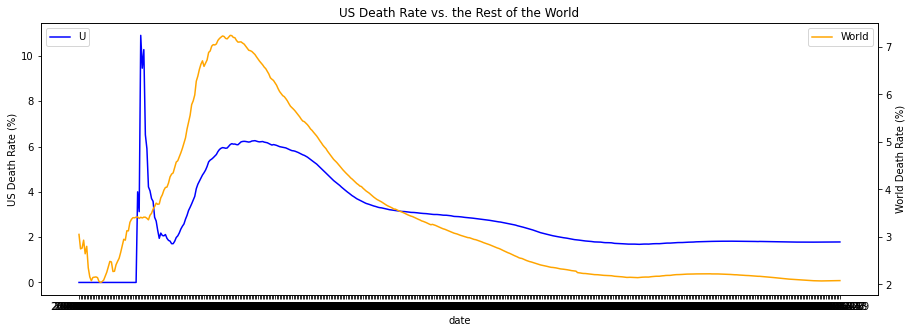

In [112]:
axis1 = df_clean.loc[df_clean["iso_code"]=="USA",["death_rate","date"]].groupby("date").sum().plot(figsize=(15,5),color = "blue")
axis1.legend("US", loc="upper left")
axis1.set_ylabel("US Death Rate (%)")

axis2 = axis1.twinx()

axis2.plot(df_clean.loc[df_clean["iso_code"]=="OWID_WRL", ["death_rate", "date"]].groupby("date").sum(), label="World", color = "orange")
axis2.legend(loc="upper right")
plt.title("US Death Rate vs. the Rest of the World")
axis2.set_ylabel("World Death Rate (%)")

plt.show()

Surprisingly, the US covid death rate reched its peak during the 1st wave, then went down sharply. It then got hifher again during the 2nd wave, but not nearly as hight as during the 1st wave. And it started going down gradually after that. 

Looking at the line representing the rest of the world, the difference is obvoius. The death rate was somewhat high in the very beginning and was gradually going up until it reached its highest peak during the 2nd wave. And it started going down gradually after that. 

However, the death rate in the US almost reached 11% during its peak, while the average death rate in rest of the world was never more than 8%. 

### Death rate histogram 

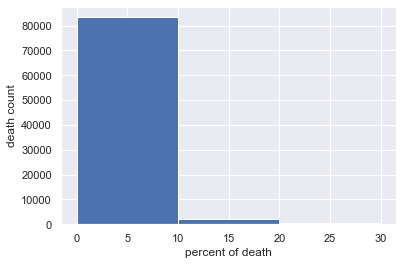

In [249]:
sns.set()
bin_edges = [0, 10, 20, 30]
_ = plt.hist(df_clean["death_rate"], bins = bin_edges)
_ = plt.xlabel("percent of death")
_ = plt.ylabel("death count")
plt.show()

### Plotting Death Rate vs. New Cases

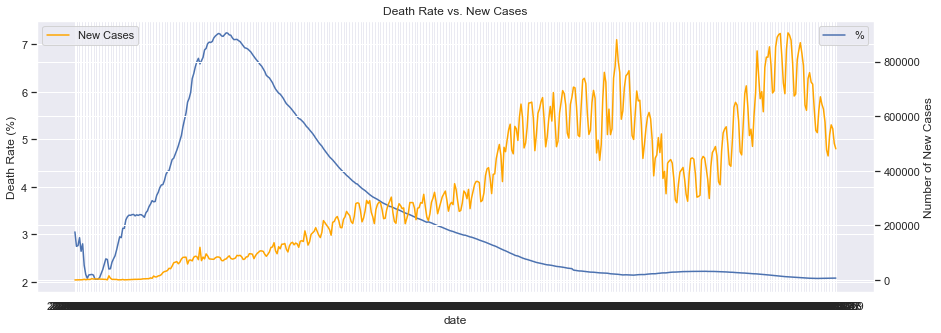

In [152]:
axis1 = df_clean.loc[df_clean["iso_code"]=="OWID_WRL",["date", "death_rate"]].groupby("date").sum().plot(figsize=(15,5))
axis1.legend("% of Deaths", loc="upper right")
axis1.set_ylabel("Death Rate (%)")

axis2 = axis1.twinx()
axis2.plot(df_clean.loc[df_clean["iso_code"]=="OWID_WRL",["date", "new_cases"]].groupby("date").sum(),color='orange',label="New Cases")
axis2.legend(loc="upper left")
axis2.set_ylabel("Number of New Cases")

plt.title("Death Rate vs. New Cases")
plt.show()

We then wanted to see how the death rate changed throughout the 3 waves. 
The chart indicates the death rate reaching its peak around the 1st wave and becoming much lower during the 2nd and 3rd waves. This could be caused by implementing new guidlines by healthcare departments around the world. 

### Calculating % of population diagnosed with Covid

In [114]:
#what % of population got diagnosed with Covid 
perc_diagnosed = df_clean["total_cases"]/df_clean["population"]*100 
perc_diagnosed

0        0.000003
1        0.000003
2        0.000003
3        0.000003
4        0.000003
           ...   
92126    0.260420
92127    0.261180
92128    0.261416
92129    0.261846
92130    0.261947
Length: 92131, dtype: float64

In [115]:
df_clean["perc_diagnosed"] = perc_diagnosed
df_clean["perc_diagnosed"].fillna(0, inplace=True)
df_clean.head(2)

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,population,total_deaths,new_deaths,death_rate,perc_diagnosed
0,AFG,Afghanistan,2020-02-24,1.0,1.0,0.0,0.0,0.026,0.026,38928341.0,0.0,0.0,0.0,0.000003
1,AFG,Afghanistan,2020-02-25,1.0,0.0,0.0,0.0,0.026,0.000,38928341.0,0.0,0.0,0.0,0.000003


### Plotting % of ppl diagnosed with Covid in the US and in the whole world

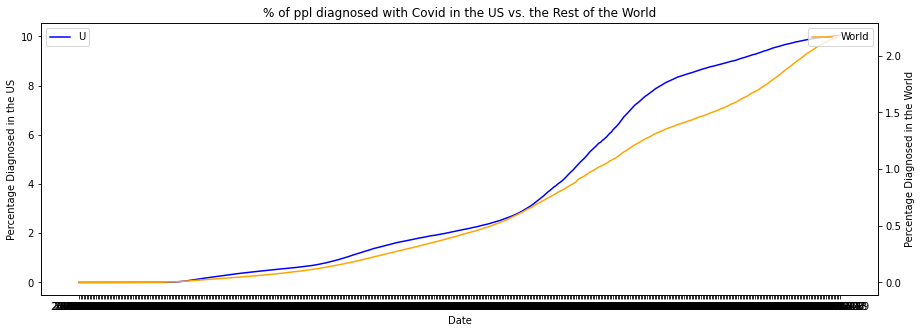

In [117]:
# % of ppl diagnosed in the US 
df_clean[df_clean.iso_code =="USA"][["date","perc_diagnosed"]].groupby("date").sum()

# % of ppl diagnosed in the world
df_clean[df_clean.iso_code =="OWID_WRL"][["date","perc_diagnosed"]].groupby("date").sum()



axis1 = df_clean[df_clean.iso_code =="USA"][["date","perc_diagnosed"]].groupby("date").sum().plot(figsize=(15,5), color = "blue", label = "US")
axis1.set_label("US")
axis1.legend("US")
axis1.set_xlabel("Date")
axis1.set_ylabel("Percentage Diagnosed in the US")
axis1.set_title("% of ppl diagnosed with Covid in the US vs. the Rest of the World")

axis2 = axis1.twinx()

axis2.plot(df_clean[df_clean.iso_code =="OWID_WRL"][["date","perc_diagnosed"]].groupby("date").sum(), color = "orange", label = "World")
axis2.legend(loc = "upper right")
axis2.set_ylabel("Percentage Diagnosed in the World")
plt.show()

Comparing the % of ppl diagnosed with Covid in the US to that in the rest of the world, we can see that the US numbers are much higher, reaching about 10% by the end of May 2021. However this could be caused by widely availabile testing program in the country, while in some other countries the tests were not so easily available to the general public.    

### Statistics and variable types

### Checking if there's a correlation between the analized variables 

In [123]:
df_clean.head(2)

,iso_code,location,date,total_cases,new_cases,new_cases_smoothed,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,population,total_deaths,new_deaths,death_rate,perc_diagnosed
0,AFG,Afghanistan,2020-02-24,1.0,1.0,0.0,0.0,0.026,0.026,38928341.0,0.0,0.0,0.0,0.000003
1,AFG,Afghanistan,2020-02-25,1.0,0.0,0.0,0.0,0.026,0.000,38928341.0,0.0,0.0,0.0,0.000003


In [206]:
cols = df_clean.columns[3:]

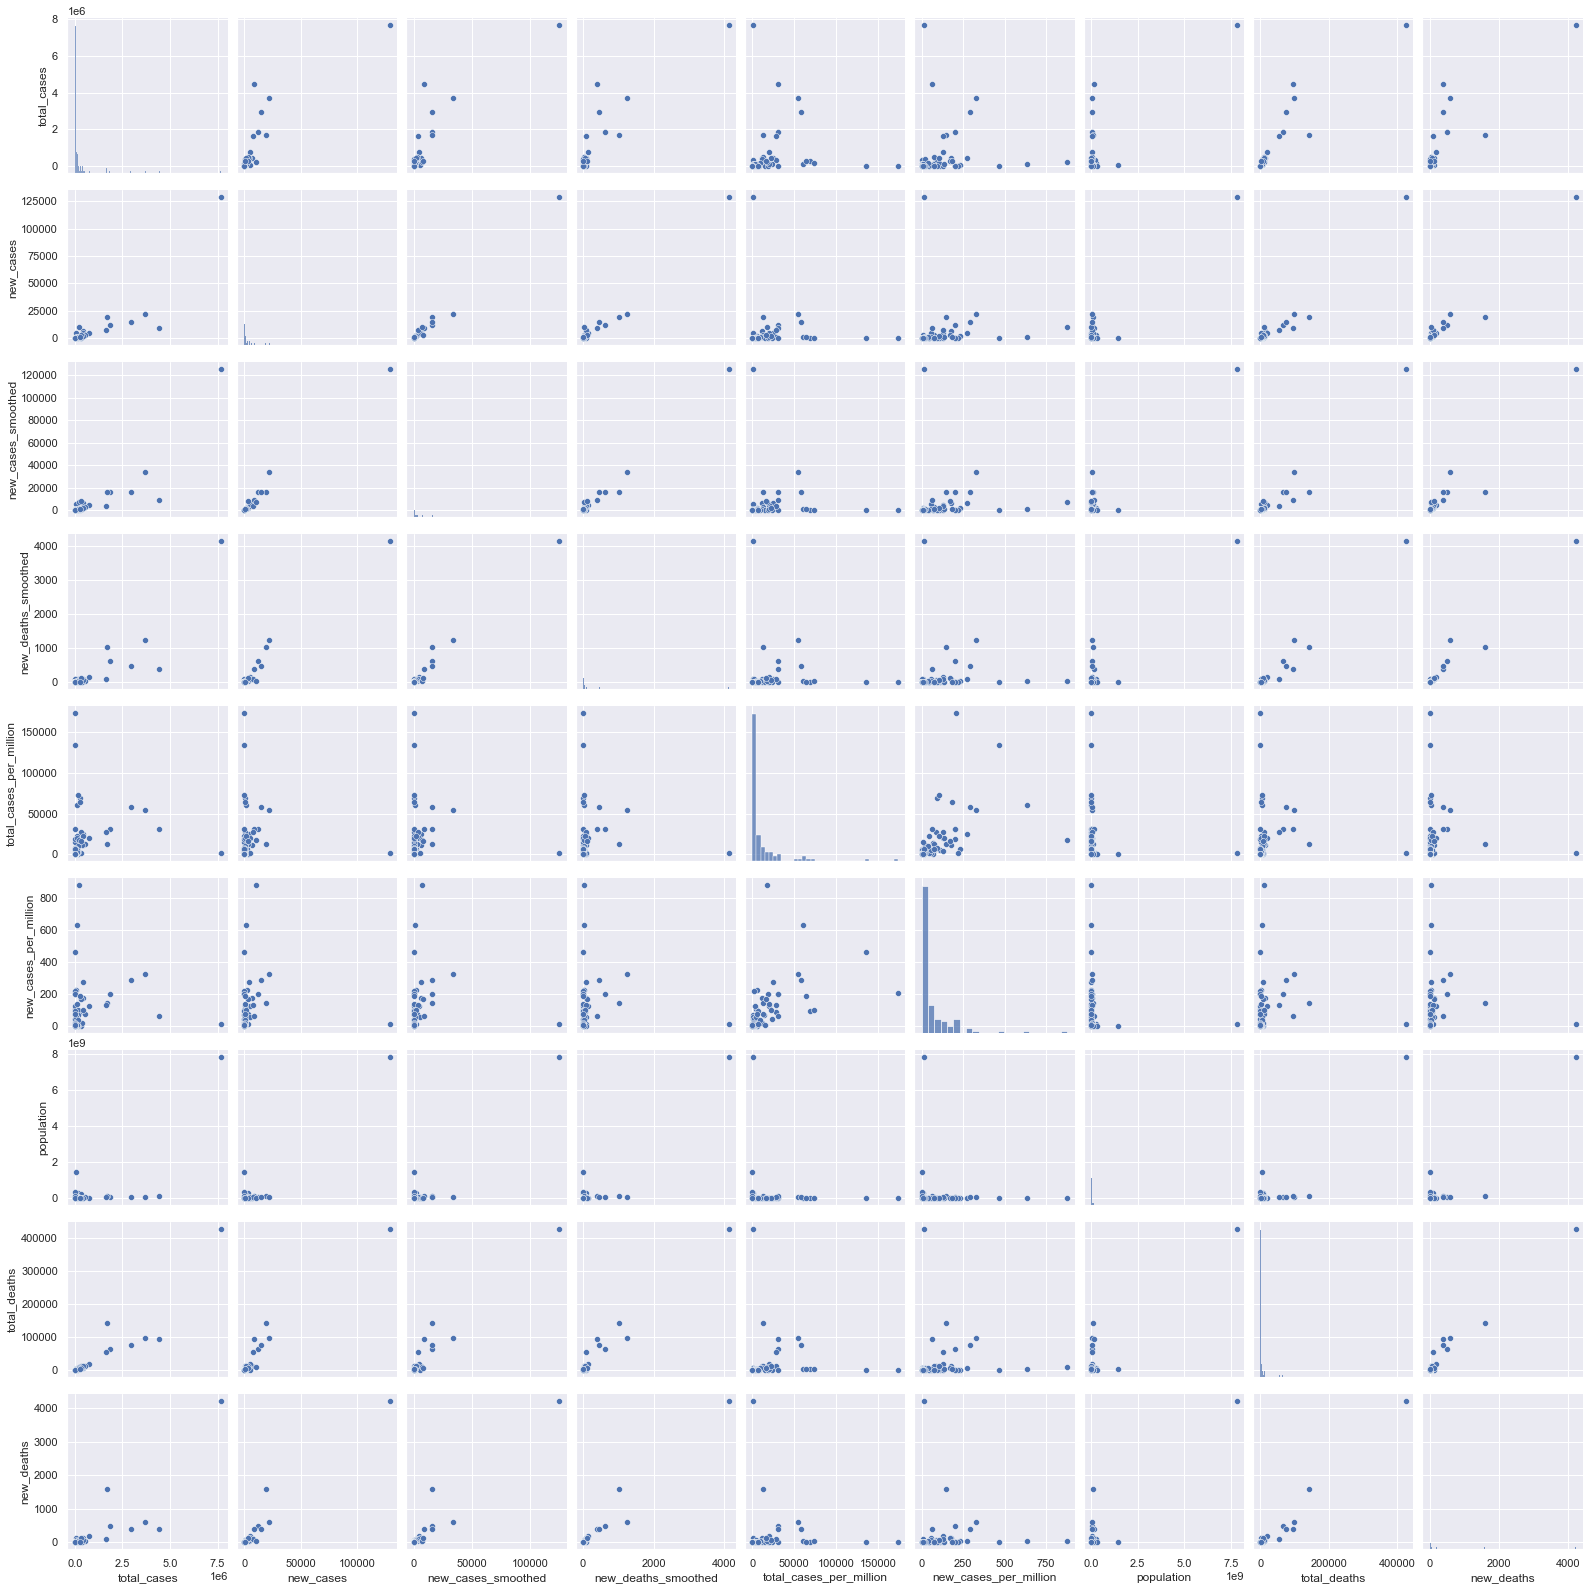

In [207]:
sns.pairplot(df_clean[cols].sample(100))

In [208]:
df_clean[cols].corr()

,total_cases,new_cases,new_cases_smoothed,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,population,total_deaths,new_deaths
total_cases,1.000000,0.895268,0.911469,0.896408,0.083183,0.032175,0.678050,0.990268,0.873946
new_cases,0.895268,1.000000,0.987140,0.938088,0.053419,0.077566,0.758670,0.907024,0.941537
new_cases_smoothed,0.911469,0.987140,1.000000,0.954301,0.056148,0.053678,0.764466,0.921706,0.936961
new_deaths_smoothed,0.896408,0.938088,0.954301,1.000000,0.052591,0.039488,0.826141,0.923827,0.977116
total_cases_per_million,0.083183,0.053419,0.056148,0.052591,1.000000,0.487526,-0.026676,0.075356,0.050125
new_cases_per_million,0.032175,0.077566,0.053678,0.039488,0.487526,1.000000,-0.019866,0.028171,0.044582
population,0.678050,0.758670,0.764466,0.826141,-0.026676,-0.019866,1.000000,0.729383,0.810848
total_deaths,0.990268,0.907024,0.921706,0.923827,0.075356,0.028171,0.729383,1.000000,0.900780
new_deaths,0.873946,0.941537,0.936961,0.977116,0.050125,0.044582,0.810848,0.900780,1.000000


### Variable correlation heatmap

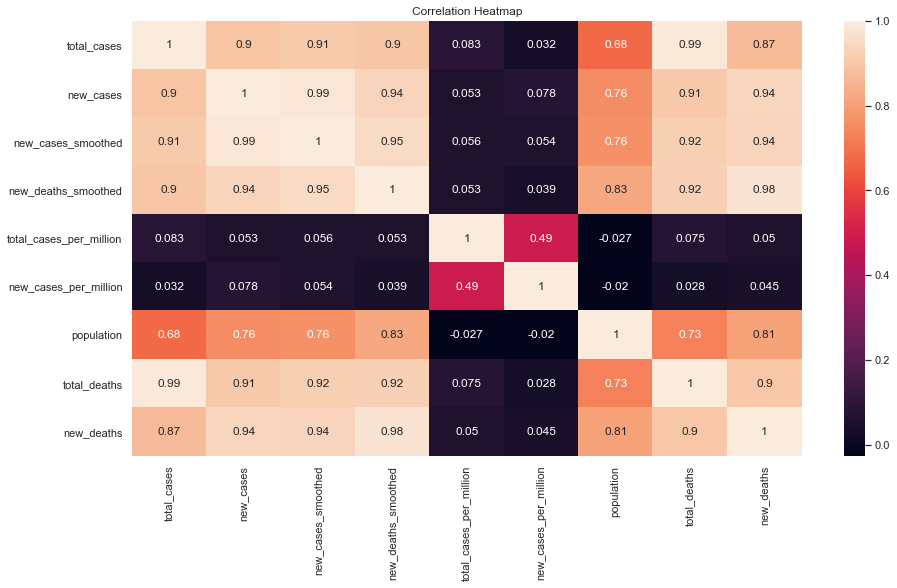

In [209]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_clean[cols].corr(method = 'pearson'), annot=True)
plt.title('Correlation Heatmap')

plt.show()

### To CSV

In [142]:
df_clean.to_csv("cleansed_data.csv", index=False)